In [1]:
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


4423680/4422102 [==============================] - 0s 0us/step


Text(0.5, 1.0, 'Ground Truth : 9')

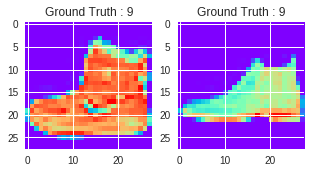

In [2]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(X_train[0,:,:], cmap='rainbow')
plt.title("Ground Truth : {}".format(y_train[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(X_test[0,:,:], cmap='rainbow')
plt.title("Ground Truth : {}".format(y_test[0]))

In [3]:
print(X_train.shape)

(60000, 28, 28)


In [4]:
X_train = X_train.reshape(-1, 28,28, 1)
X_test = X_test.reshape(-1, 28,28, 1)
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.
X_test = X_test / 255.

In [6]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)


print('Original label:', y_train[0])
print('After conversion to one-hot:', y_train_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [0]:
from sklearn.model_selection import train_test_split
X_train,valid_X,train_label,valid_label = train_test_split(X_train, y_train_one_hot, test_size=0.2, random_state=13)

In [9]:
X_train.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [0]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [0]:
batch_size = 64
epochs = 20
num_classes = 10

In [11]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
fashion_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         73856     
__________

In [13]:
fashion_train = fashion_model.fit(X_train, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 14s 293us/step - loss: 0.4598 - acc: 0.8320 - val_loss: 0.3402 - val_acc: 0.8756
Epoch 2/20
48000/48000 [==============================] - 9s 195us/step - loss: 0.2891 - acc: 0.8942 - val_loss: 0.2812 - val_acc: 0.9017
Epoch 3/20
48000/48000 [==============================] - 9s 190us/step - loss: 0.2425 - acc: 0.9096 - val_loss: 0.2389 - val_acc: 0.9149
Epoch 4/20
48000/48000 [==============================] - 9s 188us/step - loss: 0.2103 - acc: 0.9223 - val_loss: 0.2306 - val_acc: 0.9158
Epoch 5/20
48000/48000 [==============================] - 9s 188us/step - loss: 0.1838 - acc: 0.9315 - val_loss: 0.2292 - val_acc: 0.9180
Epoch 6/20
48000/48000 [==============================] - 9s 188us/step - loss: 0.1601 - acc: 0.9399 - val_loss: 0.2322 - val_acc: 0.9197
Epoch 7/20
48000/48000 [==============================] - 9s 185us/step -

In [0]:
test_eval = fashion_model.evaluate(X_test, y_test_one_hot, verbose=0)

In [15]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.4420124358639121
Test accuracy: 0.91


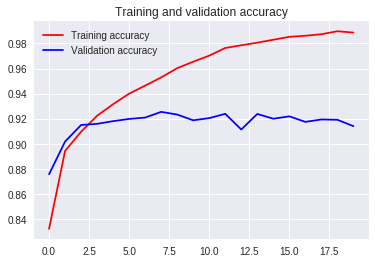

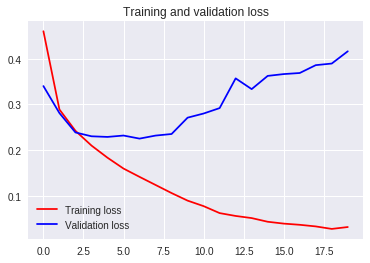

In [18]:
accuracy = fashion_train.history['acc']
val_accuracy = fashion_train.history['val_acc']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [19]:
batch_size = 64
epochs = 20
num_classes = 10
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))           
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [20]:
fashion_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
__________

In [0]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [22]:
fashion_train_dropout = fashion_model.fit(X_train, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 10s 212us/step - loss: 0.6110 - acc: 0.7714 - val_loss: 0.3897 - val_acc: 0.8523
Epoch 2/20
48000/48000 [==============================] - 9s 196us/step - loss: 0.3824 - acc: 0.8593 - val_loss: 0.3517 - val_acc: 0.8689
Epoch 3/20
48000/48000 [==============================] - 9s 197us/step - loss: 0.3279 - acc: 0.8802 - val_loss: 0.2863 - val_acc: 0.8908
Epoch 4/20
48000/48000 [==============================] - 9s 196us/step - loss: 0.3050 - acc: 0.8870 - val_loss: 0.2972 - val_acc: 0.8909
Epoch 5/20
48000/48000 [==============================] - 9s 196us/step - loss: 0.2835 - acc: 0.8946 - val_loss: 0.2448 - val_acc: 0.9077
Epoch 6/20
48000/48000 [==============================] - 9s 193us/step - loss: 0.2672 - acc: 0.9010 - val_loss: 0.2565 - val_acc: 0.9022
Epoch 7/20
48000/48000 [==============================] - 9s 197us/step - loss: 0.2561 - acc: 0.9044 - val_loss: 0.2368 -

In [24]:
test_eval = fashion_model.evaluate(X_test, y_test_one_hot, verbose=1)

10000/10000 [==============================] - 1s 99us/step


In [25]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.22129144211411475
Test accuracy: 0.9189


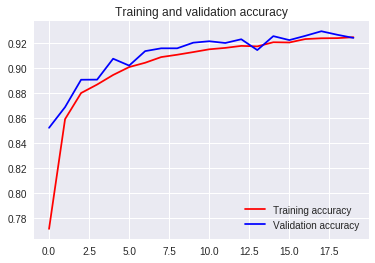

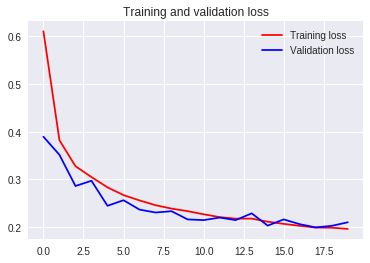

In [27]:
accuracy = fashion_train_dropout.history['acc']
val_accuracy = fashion_train_dropout.history['val_acc']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [28]:
predicted_classes = fashion_model.predict(X_test)
print(predicted_classes)

[[1.71521530e-11 8.20387758e-09 2.09151273e-11 ... 5.21711008e-05
  7.41734868e-11 9.99947667e-01]
 [1.18796033e-05 4.37706607e-11 9.99932408e-01 ... 1.30575271e-12
  7.66264049e-12 1.38656583e-13]
 [8.83419299e-17 1.00000000e+00 2.80654503e-18 ... 4.96770167e-25
  3.52654626e-22 3.43218309e-22]
 ...
 [1.10064865e-11 1.01217032e-14 1.42527726e-11 ... 2.01655438e-13
  1.00000000e+00 1.18423659e-14]
 [3.93089283e-10 1.00000000e+00 6.13044199e-11 ... 4.78915410e-13
  7.26031214e-13 2.44711651e-12]
 [4.77316571e-05 5.42760120e-07 1.74093017e-04 ... 3.05739958e-02
  4.85074194e-03 6.06216163e-05]]


In [29]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes.shape, y_test.shape

((10000,), (10000,))

Found 9160 correct labels


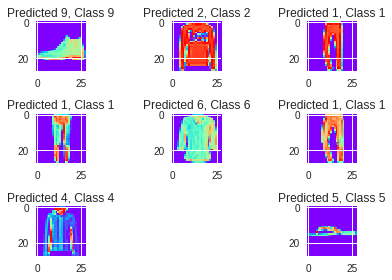

In [30]:
correct = np.where(predicted_classes==y_test)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='rainbow', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    plt.tight_layout()

Found 840 incorrect labels


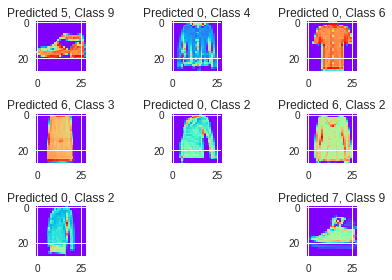

In [31]:
incorrect = np.where(predicted_classes!=y_test)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='rainbow', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    plt.tight_layout()

In [32]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.78      0.89      0.83      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.91      0.84      0.87      1000
     Class 3       0.94      0.91      0.93      1000
     Class 4       0.84      0.91      0.87      1000
     Class 5       0.99      0.98      0.98      1000
     Class 6       0.80      0.72      0.76      1000
     Class 7       0.95      0.98      0.97      1000
     Class 8       0.99      0.98      0.98      1000
     Class 9       0.98      0.96      0.97      1000

   micro avg       0.92      0.92      0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

